In [11]:
#apply Xgboost on the dataset 
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [12]:
#load dataset
data = pd.read_csv('parkinsons.data')

In [13]:
#apply Xgboost on the dataset
X = data.drop(['name','status'], axis=1)
y = data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

Accuracy: 92.31%


In [14]:
#classification report
print("Classification Report")
print(classification_report(y_test, y_pred))

#confusion matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

#accuracy of the model
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.91      1.00      0.96        32

    accuracy                           0.92        39
   macro avg       0.96      0.79      0.84        39
weighted avg       0.93      0.92      0.91        39

Confusion Matrix
[[ 4  3]
 [ 0 32]]
Accuracy: 92.31%


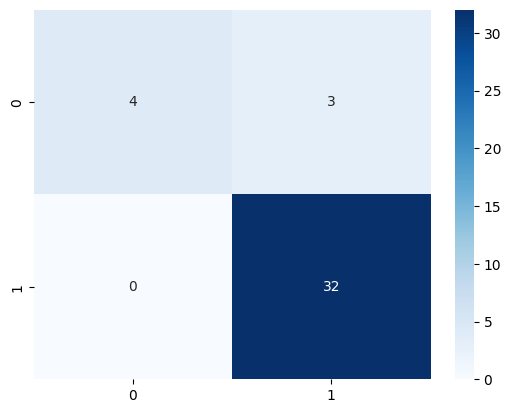

In [15]:
#print the confusion matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.show()
 

In [16]:
#apply genetic algorithm to select the best features
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

#apply genetic algorithm to select the best features
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=14)
embeded_rf_selector.fit(X, y)
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

#apply Xgboost on the dataset with the selected features
X = data[embeded_rf_feature]
y = data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)



6 selected features
['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Jitter(Abs)', 'spread1', 'spread2', 'PPE']


In [17]:
#apply Xgboost on the dataset with the selected features
X = data[embeded_rf_feature]
y = data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100.0))


Accuracy: 94.87%


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39

Confusion Matrix
[[ 5  2]
 [ 0 32]]


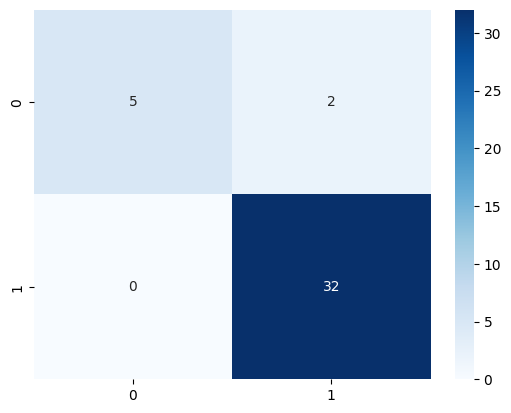

In [18]:
#give the classification report
print("Classification Report")
print(classification_report(y_test, y_pred))

#give the confusion matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

#heatmap of the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.show()
